In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 파일 로드 (파일명 오타 주의: condtion)
with open('pre_re_no_metrics.json', 'r') as f:
    no_data = json.load(f)

with open('pre_re_prob_metrics.json', 'r') as f:
    prob_data = json.load(f)
with open('pre_re_bin_metrics.json', 'r') as f:
    bin_data = json.load(f)
# 데이터프레임 구성
plot_data = [
    # {"Model": "Reaction+Pretreatment", "Metric": "RMSE", "Value": pre_re_data["RMSE"]},
    {"Model": "Gaussian Reconstruction", "Metric": "R2 Score", "Value": no_data["R2"]},
    # {"Model": "Only Reaction", "Metric": "RMSE", "Value": re_data["RMSE"]},
    {"Model": "Probabilistic Gated Reconstruction", "Metric": "R2 Score", "Value": prob_data["R2"]},
    {"Model": "Hard Gated Reconstruction", "Metric": "R2 Score", "Value": bin_data["R2"]}


]
df = pd.DataFrame(plot_data)

C:\Users\User\AppData\Local\Temp\ipykernel_10612\955462953.py:13: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(


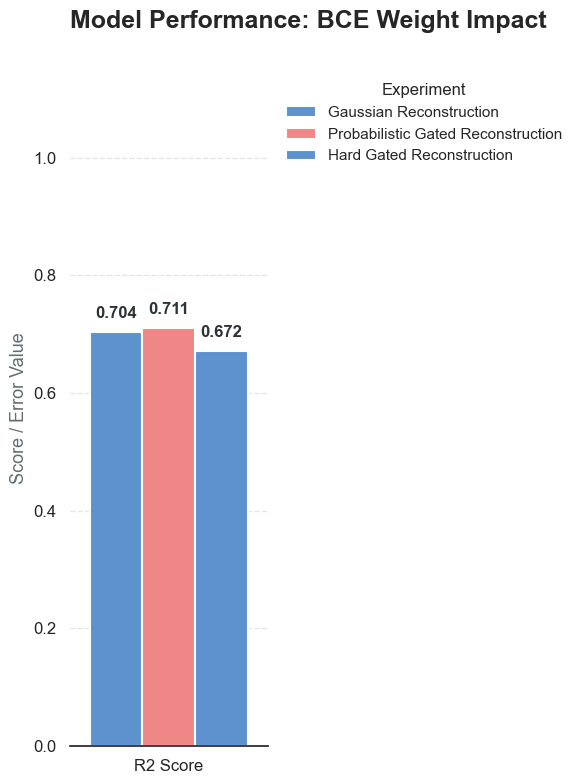

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정: 화이트 스타일로 배경을 깨끗하게
sns.set_theme(style="white", palette=None)

fig, ax = plt.subplots(figsize=(6, 8)) # 가로 폭을 살짝 넓혀 가독성 확보

# 세련된 커스텀 컬러 (차분한 네이비와 오렌지 포인트)
custom_palette = ["#4A90E2", "#FF7675"]

# 바 차트 생성
barplot = sns.barplot(
    data=df, 
    x="Metric", 
    y="Value", 
    hue="Model",
    palette=custom_palette, 
    ax=ax,
    edgecolor='white', # 막대 사이 구분선
    linewidth=1.5
)

# 막대 위에 수치 라벨 추가 (디자인 개선)
for p in ax.patches:
    if p.get_height() > 0: # 0인 값 제외
        ax.annotate(
            f'{p.get_height():.3f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            xytext=(0, 8), # 간격을 살짝 더 띄움
            textcoords='offset points',
            fontsize=12,
            fontweight='600',
            color='#2D3436' # 진한 회색으로 가독성 높임
        )

# 그래프 디테일 설정
ax.set_title("Model Performance: BCE Weight Impact", fontsize=18, pad=30, fontweight='bold', loc='left')
ax.set_ylim(0, 1.15) # 라벨 공간 확보를 위해 살짝 높임
ax.set_ylabel("Score / Error Value", fontsize=13, color='#636E72')
ax.set_xlabel("") # 하단 라벨 제거로 깔끔하게

# 축 및 그리드 미세 조정
sns.despine(left=True, bottom=False) # 왼쪽 테두리 제거
ax.yaxis.grid(True, linestyle='--', alpha=0.5) # 가로 그리드만 연하게
ax.tick_params(axis='both', which='major', labelsize=12)

# 범례(Legend) 스타일링
plt.legend(
    title="Experiment", 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    frameon=False,
    fontsize=11
)

plt.tight_layout()
plt.savefig('regression_comparison_pro.png', dpi=300, bbox_inches='tight')
plt.show()

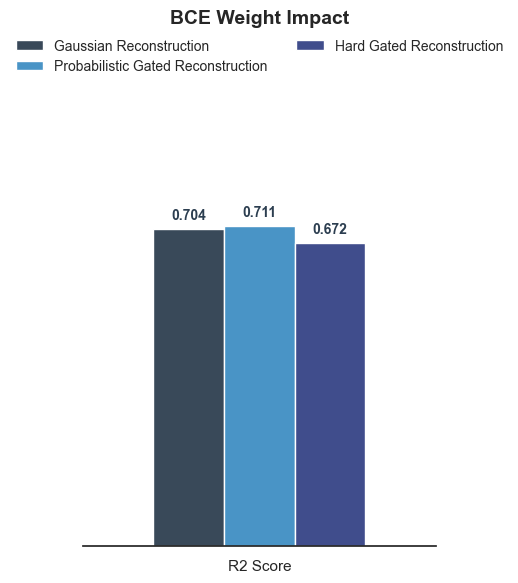

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 스타일 테마 설정 (그리드 제거로 더 가볍게)
sns.set_theme(style="white")

# 2. figsize 조절 (가로 5, 세로 6 정도로 콤팩트하게)
fig, ax = plt.subplots(figsize=(5, 6))

# 3. 색상 선택 (확실한 대비를 주는 슬림한 컬러)
colors = ["#34495E", "#3498DB",'#349'] # 다크 그레이 & 스카이 블루

# 4. 바 차트 생성
# width를 줄여 막대를 슬림하게 만들고, dodge로 간격을 조정합니다.
barplot = sns.barplot(
    data=df, 
    x="Metric", 
    y="Value", 
    hue="Model",
    palette=colors,
    ax=ax,
    width=0.6,      # 막대 자체의 너비를 줄임
    edgecolor='white',
    linewidth=1
)

# 5. 수치 라벨 (폰트 크기를 살짝 줄여 부피감 감소)
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(
            f'{h:.3f}',
            (p.get_x() + p.get_width() / 2., h),
            ha='center', va='bottom',
            xytext=(0, 5), # 숫자를 막대에 더 가깝게
            textcoords='offset points',
            fontsize=10,   # 콤팩트한 폰트 사이즈
            fontweight='bold',
            color='#2C3E50'
        )

# 6. 군더더기 없는 디테일 설정
ax.set_title("BCE Weight Impact", fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 1.1)
ax.set_ylabel("Score", fontsize=11, color='gray')
ax.set_xlabel("")

# 테두리 완전 제거 (하단선 제외)
sns.despine(left=True, bottom=False)
ax.yaxis.set_visible(False) # 왼쪽 수치 축을 없애고 막대 위 숫자에만 집중하게 함 (더 깔끔함)

# 7. 범례를 상단 안쪽으로 배치하여 공간 절약
ax.legend(
    title="", 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.05),
    ncol=2, 
    frameon=False,
    fontsize=10
)

plt.tight_layout()
plt.savefig('compact_regression_plot.png', dpi=300)
plt.show()